In [1]:
import pandas as pd
import matplotlib.pyplot as mt
import seaborn as sea

In [2]:
# pd.set_option("display.max.rows",100)

In [3]:
you=pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\International_Education_Costs.csv")
you.head(3)

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35


In [4]:
you.drop('Exchange_Rate',axis=1,inplace=True)

In [5]:
you.isnull().sum()

Country              0
City                 0
University           0
Program              0
Level                0
Duration_Years       0
Tuition_USD          0
Living_Cost_Index    0
Rent_USD             0
Visa_Fee_USD         0
Insurance_USD        0
dtype: int64

In [6]:
you.duplicated().sum()

np.int64(0)

In [19]:
you.rename(columns={"Country":'Nations',"University":"Universities",
                    "Level":"Degree_Levels","Duration_Years":"Years",
                   "Tuition_USD":"Tuition_Fees_($)","Rent_USD":"Rent_($)"},inplace=True)

In [20]:
you.columns

Index(['Nations', 'City', 'Universities', 'Program', 'Degree_Levels', 'Years',
       'Tuition_Fees_($)', 'Living_Cost_Index', 'Rent_($)', 'Visa_Fee_USD',
       'Insurance_USD'],
      dtype='object')

In [7]:
# you[['Country','Level']].value_counts().sort_values(ascending=False)

In [8]:
# level=you['Level'].value_counts()
# level

In [21]:
average_fees=you.groupby('Nations')['Tuition_Fees_($)'].mean().sort_values(ascending=False)
average_fees

Nations
USA          47742.307692
Australia    34610.465116
Singapore    34172.222222
UK           30341.935484
Canada       29456.578947
                 ...     
Argentina        0.000000
Iceland          0.000000
Finland          0.000000
Norway           0.000000
Sweden           0.000000
Name: Tuition_Fees_($), Length: 71, dtype: float64

In [22]:
avg=average_fees.head(5)
avg

Nations
USA          47742.307692
Australia    34610.465116
Singapore    34172.222222
UK           30341.935484
Canada       29456.578947
Name: Tuition_Fees_($), dtype: float64

Text(0, 0.5, ' ')

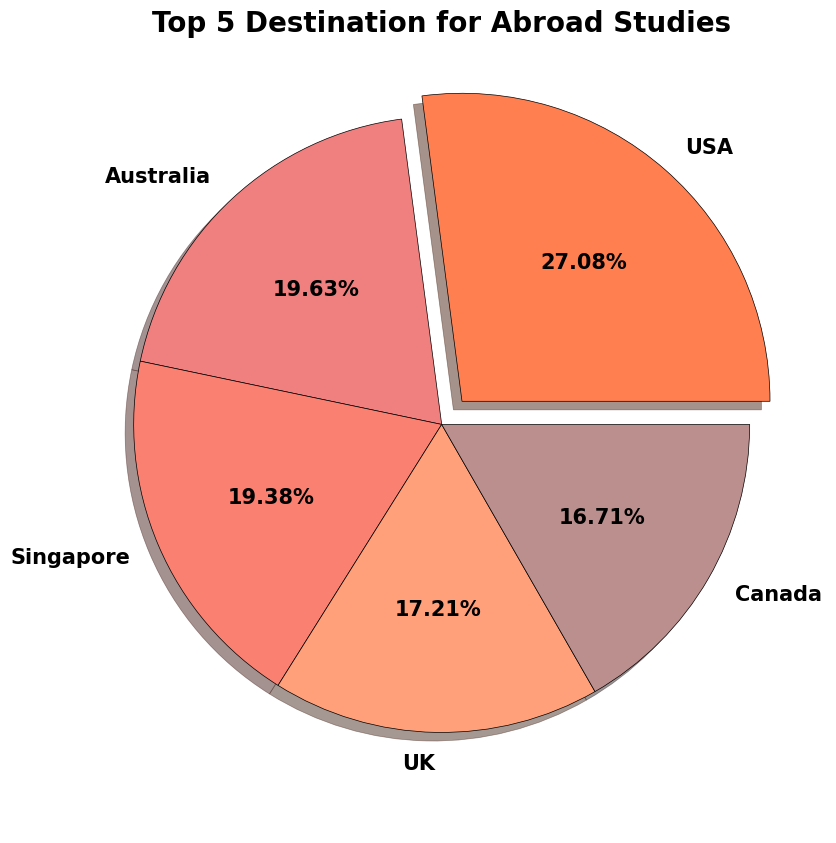

In [23]:
mt.style.use('bmh')

avg.plot(kind='pie',explode=[0.1,0,0,0,0],figsize=(10,10),
         shadow=True,colors=["coral","lightcoral","salmon","lightsalmon",'rosybrown'],
        autopct="%0.2f%%",wedgeprops={'edgecolor':'black'},textprops={'fontweight':'bold','size':15})

mt.title('Top 5 Destination for Abroad Studies',fontweight='bold',size=20)
mt.xlabel(' ')
mt.ylabel(' ')

In [12]:
pro=you['Program'].value_counts()
pro

Program
Computer Science           312
Data Science                82
Computer Engineering        71
Software Engineering        57
Artificial Intelligence     53
                          ... 
Electronics                  1
Electronic Engineering       1
Digital Design               1
Digital Business             1
Data Systems                 1
Name: count, Length: 92, dtype: int64

In [13]:
pr=pro.sort_values(ascending=True)
pr.tail(5)

Program
Artificial Intelligence     53
Software Engineering        57
Computer Engineering        71
Data Science                82
Computer Science           312
Name: count, dtype: int64

Text(0, 0.5, 'Programs')

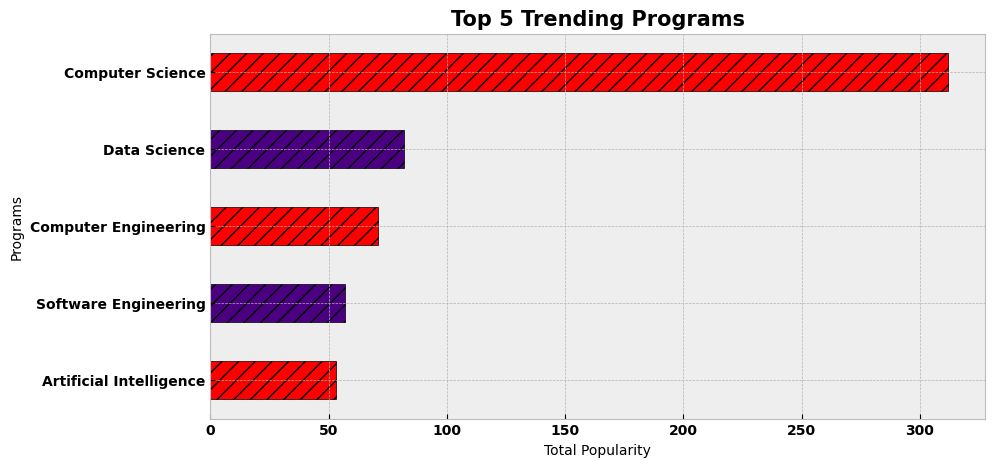

In [14]:
mt.style.use('bmh')

mt.figure(figsize=(10,5))
pr.tail(5).plot(kind='barh',color=['red','indigo'],
                hatch='//',edgecolor='black')

mt.title('Top 5 Trending Programs',fontweight='bold',size=15)

mt.yticks(fontweight='semibold',size=10)
mt.xticks(fontweight='semibold',size=10)

mt.xlabel('Total Popularity',fontweight='medium',size=10)
mt.ylabel('Programs',fontweight='medium',size=10)

In [15]:
# you.reset_index(inplace=True)

In [26]:
you.set_index('Nations',inplace=True)

In [27]:
you.head(2)

,City,Universities,Program,Degree_Levels,Years,Tuition_Fees_($),Living_Cost_Index,Rent_($),Visa_Fee_USD,Insurance_USD
Nations,,,,,,,,,,
USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500
UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800


C:\Users\hp\AppData\Local\Temp\ipykernel_8336\3917452892.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sea.countplot(data=you.loc['USA'],x='Degree_Levels',palette='Set1')
C:\Users\hp\AppData\Local\Temp\ipykernel_8336\3917452892.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sea.countplot(data=you.loc['UK'],x='Degree_Levels',palette='Set2')
C:\Users\hp\AppData\Local\Temp\ipykernel_8336\3917452892.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sea.countplot(data=you.loc['Canada'],x='Degree_Levels',palette='tab20')
C:\Users\hp\AppData\Local\Temp\ipykernel_8336\3

Text(0.5, 1.0, 'Australia')

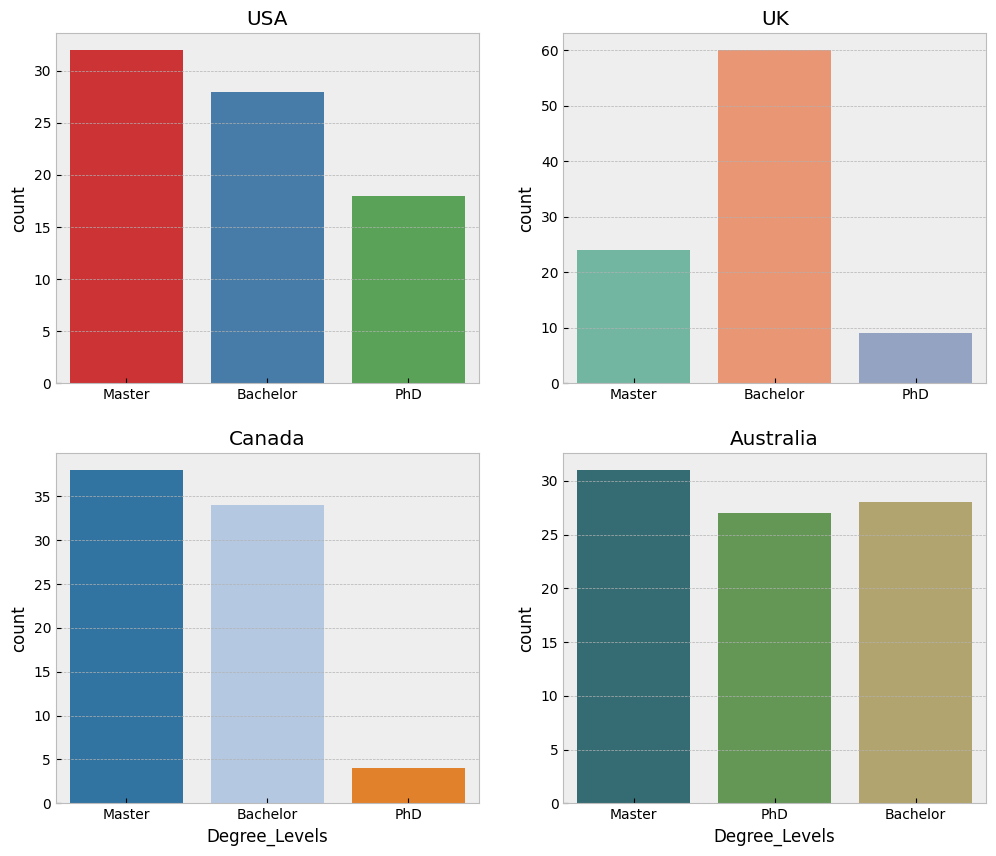

In [28]:
mt.style.use('seaborn-v0_8-bright')
mt.figure(figsize=(12,10))

mt.subplot(2,2,1)
sea.countplot(data=you.loc['USA'],x='Degree_Levels',palette='Set1')
mt.title('USA')
mt.xlabel('')

mt.subplot(2,2,2)
sea.countplot(data=you.loc['UK'],x='Degree_Levels',palette='Set2')
mt.title('UK')
mt.xlabel('')

mt.subplot(2,2,3)
sea.countplot(data=you.loc['Canada'],x='Degree_Levels',palette='tab20')
mt.title('Canada')

mt.subplot(2,2,4)
sea.countplot(data=you.loc['Australia'],x='Degree_Levels',palette='gist_earth')
mt.title('Australia')


In [29]:
you.head(3)

,City,Universities,Program,Degree_Levels,Years,Tuition_Fees_($),Living_Cost_Index,Rent_($),Visa_Fee_USD,Insurance_USD
Nations,,,,,,,,,,
USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500
UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800
Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900


In [30]:
you["Universities"]=you["Universities"].str.replace("MIT",'Massachusetts Institute Technology')
you['Universities']=you['Universities'].str.replace("UC","University of California")
you['Universities']=you['Universities'].str.replace("LA","-Los Angeles")

In [31]:
us_university=you.loc['USA'].groupby('Universities')['Tuition_Fees_($)'].mean().sort_values(ascending=False)
us_un=pd.DataFrame(us_university)
us_un.drop(['Massachusetts','UT Austin','UIUniversity of California'],inplace=True)

In [32]:
us=us_un
us


,Tuition_Fees_($)
Universities,
Columbia University,58933.333333
Harvard University,56700.000000
University of Chicago,56133.333333
Massachusetts Institute Technology,55866.666667
Yale University,54500.000000
Carnegie Mellon,54400.000000
Stanford University,54040.000000
Princeton University,54000.000000
Northeastern University,54000.000000


Text(0.5, 0, 'Fees')

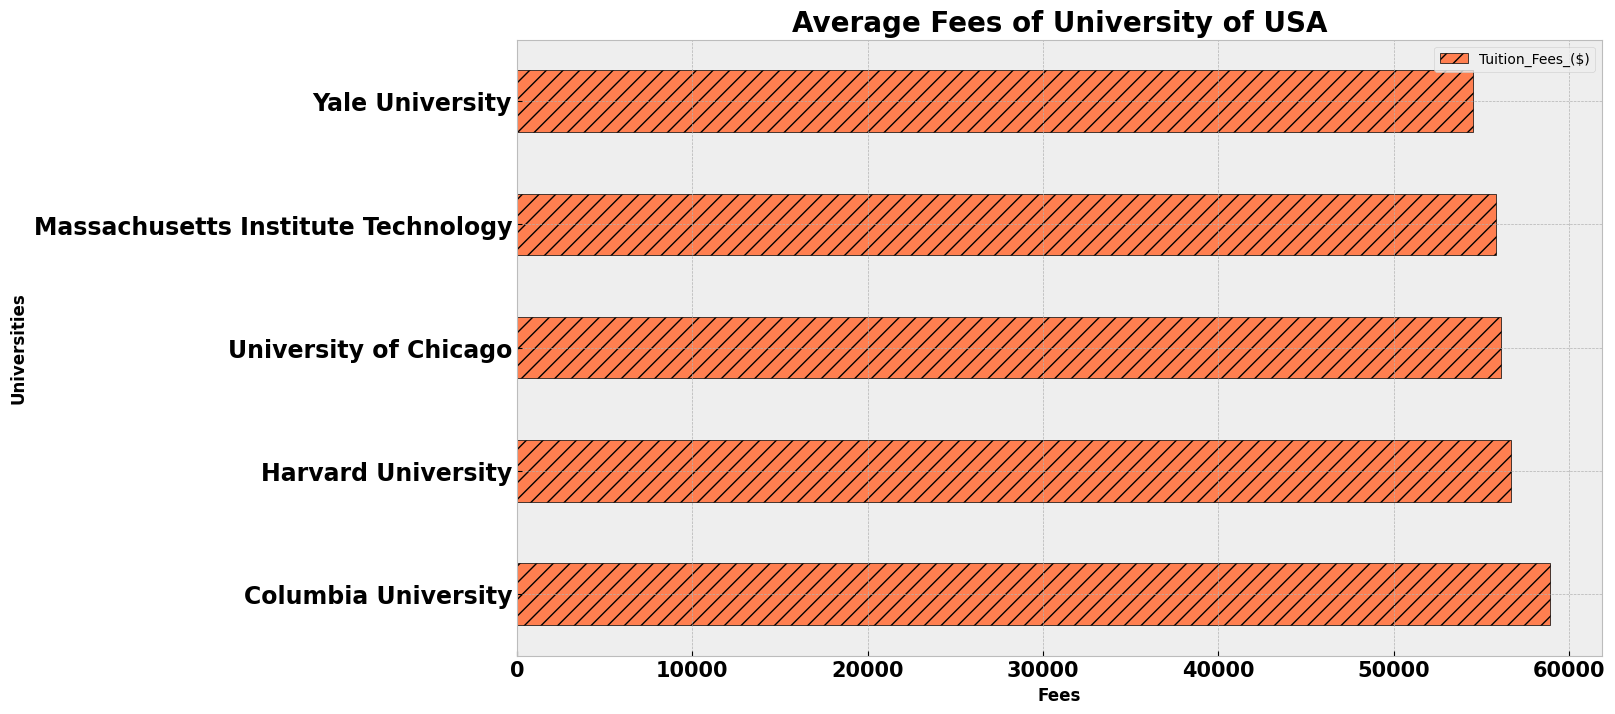

In [41]:
mt.style.use('seaborn-v0_8-dark-palette')

us.head(5).plot(kind='barh',figsize=(14,8),
                hatch='//',edgecolor='black',
                color='coral')

mt.xticks(fontweight='bold',size=15)
mt.yticks(fontweight='semibold',size=17)

mt.title('Average Fees of University of USA',fontweight='semibold',size=20)

mt.ylabel('Universities',fontweight='heavy',size=12)
mt.xlabel('Fees',fontweight='heavy',size=12)

In [42]:
us_program=you.loc['USA'].groupby('Program')['Tuition_Fees_($)'].mean().sort_values(ascending=False)
us_program

Program
Economics                  62000.000000
Artificial Intelligence    56533.333333
Electrical Engineering     53800.000000
Software Engineering       53750.000000
Aerospace Engineering      52300.000000
Data Science               52300.000000
Physics                    52000.000000
Robotics                   52000.000000
Data Analytics             51133.333333
Software Development       50000.000000
Mathematics                49500.000000
Computer Engineering       49150.000000
Chemistry                  49000.000000
Biotechnology              49000.000000
Machine Learning           48000.000000
Engineering                48000.000000
Computer Science           44110.526316
Industrial Engineering     43800.000000
Information Technology     41200.000000
Chemical Engineering       40900.000000
Name: Tuition_Fees_($), dtype: float64

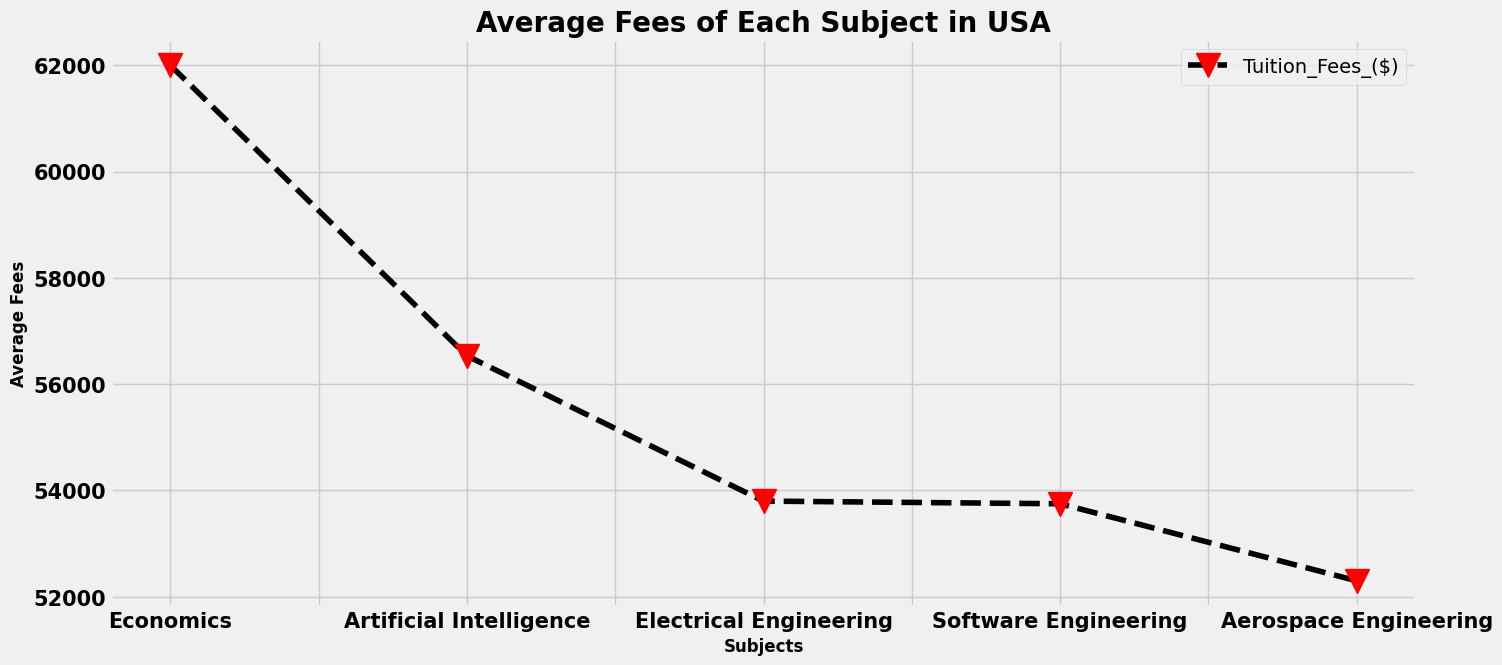

In [43]:
mt.style.use('fivethirtyeight')

us_program.head(5).plot(kind='line',figsize=(15,7),
                        color='black',linestyle='--',
                        marker='v',mfc='red',
                        mec='red',markersize=17)

mt.xticks(fontweight='bold',size=15)
mt.yticks(fontweight='semibold',size=15)

mt.title('Average Fees of Each Subject in USA',fontweight='heavy',size=20)

mt.ylabel('Average Fees',fontweight='heavy',size=12)
mt.xlabel('Subjects',fontweight='heavy',size=12)

mt.legend(fontsize='medium')

In [47]:
us_city=you.loc['USA'].groupby('City')['Rent_($)'].mean().sort_values(ascending=False)
usci=pd.DataFrame(us_city)
usci.drop('MIT',inplace=True)
usc=usci
usc.style.format(precision=0).bar(subset=['Rent_($)'],cmap='coolwarm')



,Rent_($)
City,
New York,2500
San Francisco,2400
Stanford,2325
Cambridge,2250
Los Angeles,2200
Boston,2140
Berkeley,2100
New Haven,2100
Seattle,2033


In [48]:
you.loc['UK'].head(2)

,City,Universities,Program,Degree_Levels,Years,Tuition_Fees_($),Living_Cost_Index,Rent_($),Visa_Fee_USD,Insurance_USD
Nations,,,,,,,,,,
UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800
UK,Bristol,University of Bristol,Mathematics,Bachelor,3.0,31200,69.8,1100,485,800


<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

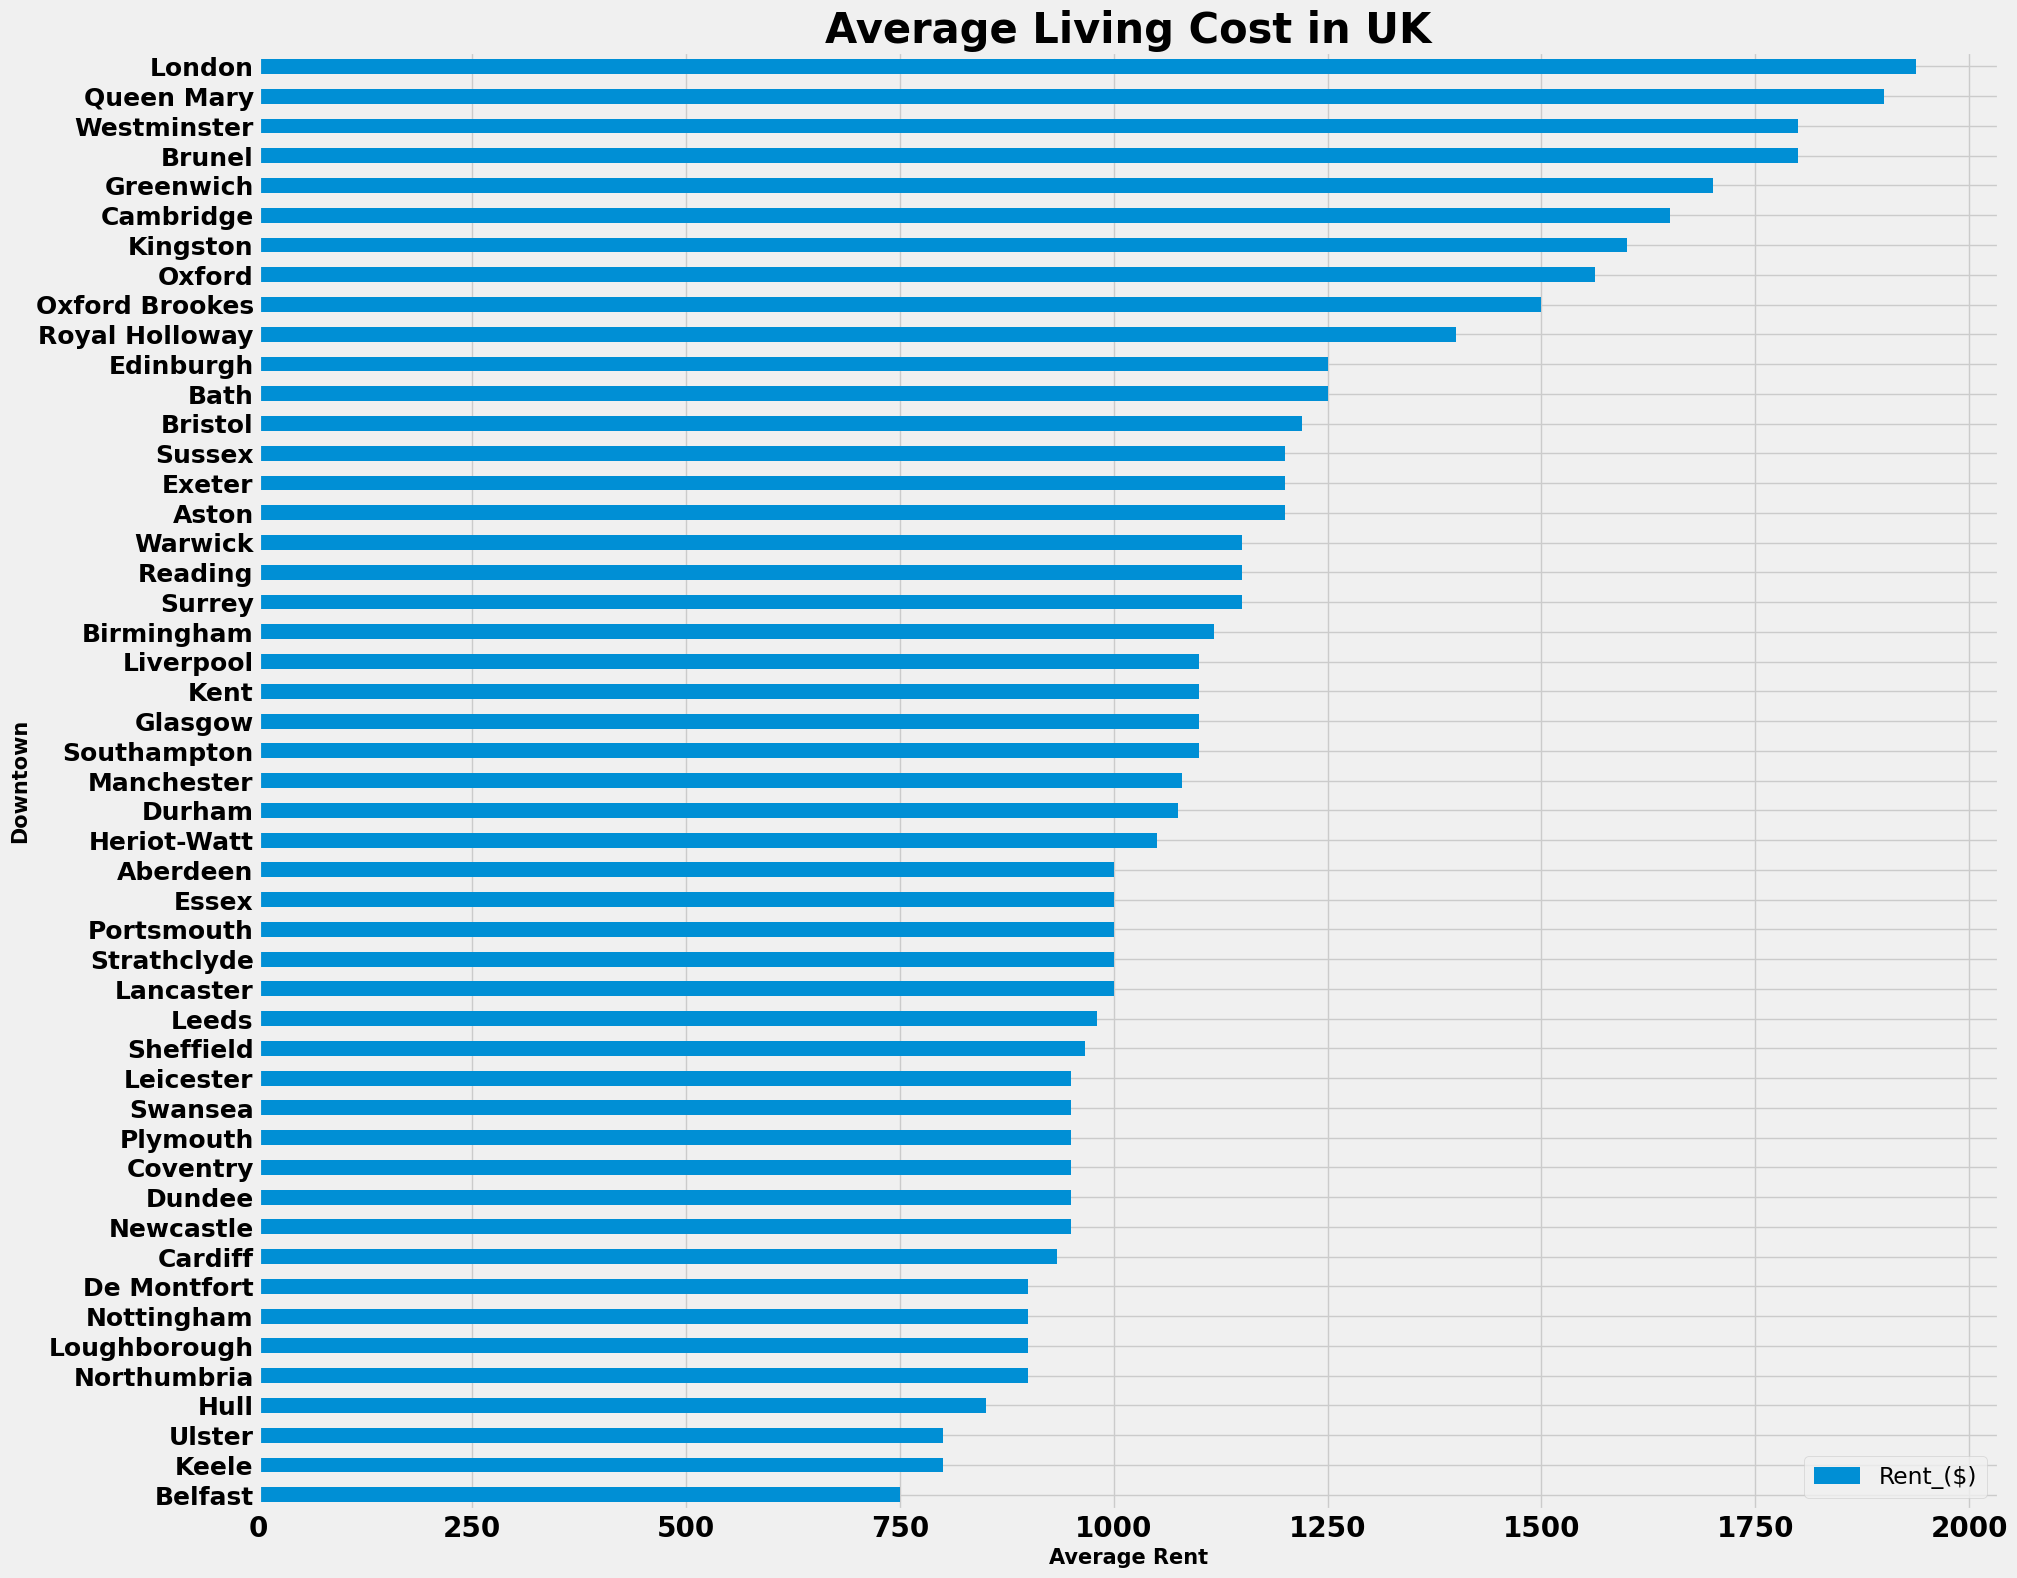

In [49]:
uk_mixed=you.loc['UK'].groupby('City')['Rent_($)'].mean().sort_values(ascending=True)

uk_mixed.plot(kind='barh',figsize=(20,18))

mt.yticks(fontweight='bold',size=18)
mt.xticks(fontweight='bold',size=20)

mt.title('Average Living Cost in UK',fontweight='bold',size=30)

mt.xlabel('Average Rent',fontweight='heavy',size=15)
mt.ylabel('Downtown',fontweight='heavy',size=15)

mt.legend(fontsize='large')
mt.legend

In [50]:
you['Universities']=you['Universities'].str.replace('UWE','University of West of England-')

In [51]:
uk_uni=you.loc['UK'].groupby('Universities')['Tuition_Fees_($)'].mean().sort_values(ascending=True)

uk_=pd.DataFrame(uk_uni)

uk_.style.format(precision=2).bar(cmap='Spectral')

,Tuition_Fees_($)
Universities,
Kingston University,18700.00
University of Greenwich,19000.00
University of Westminster,19300.00
De Montfort University,19600.00
Oxford Brookes University,19900.00
Coventry University,20200.00
Northumbria University,20500.00
Ulster University,20800.00
University of Portsmouth,21100.00


In [77]:
uk_prog=you.loc['UK'].groupby('Program')['Tuition_Fees_($)'].mean().sort_values(ascending=False)

uk=pd.DataFrame(uk_prog)

uk.head(5)

,Tuition_Fees_($)
Program,
Data Science,38166.666667
Chemistry,36500.000000
Artificial Intelligence,36450.000000
Computer Engineering,35500.000000
Software Engineering,34500.000000


C:\Users\hp\AppData\Local\Temp\ipykernel_8336\2773386334.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sea.barplot(data=uk,y='Program',x='Tuition_Fees_($)',palette='CMRmap')


Text(0, 0.5, 'Courses')

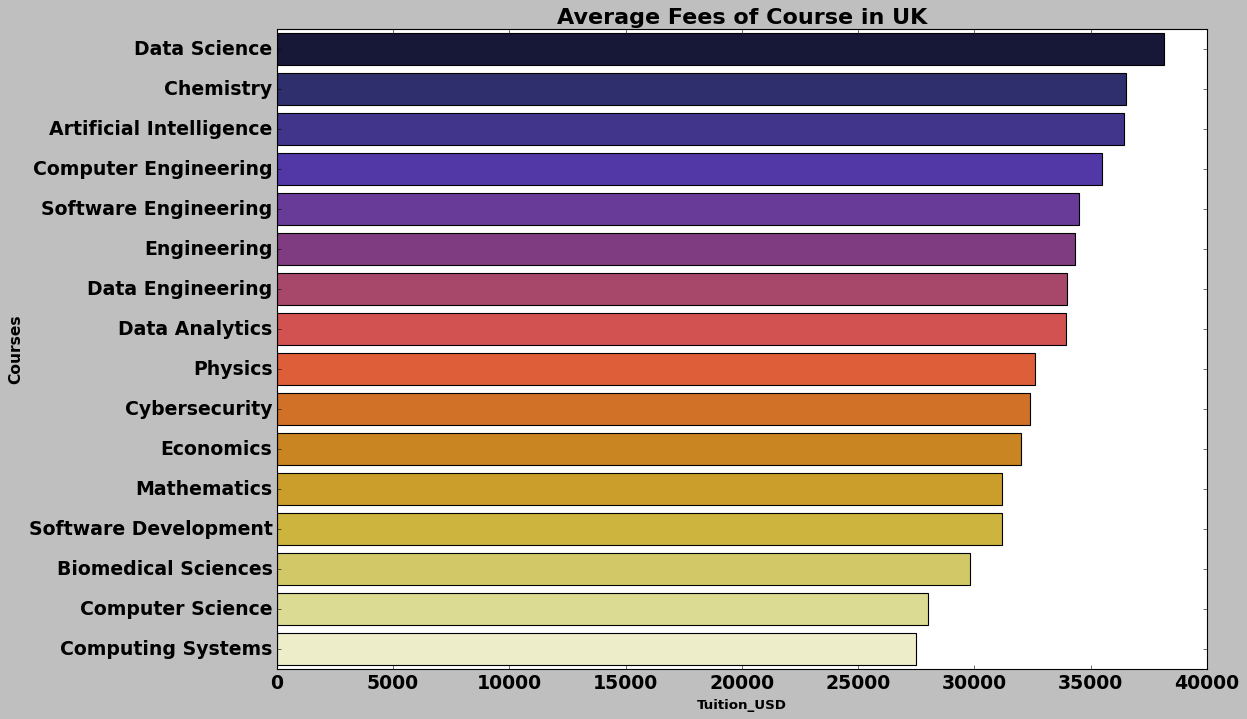

In [53]:
mt.style.use('classic')

mt.figure(figsize=(15,10))
sea.barplot(data=uk,y='Program',x='Tuition_Fees_($)',palette='CMRmap')

mt.title('Average Fees of Course in UK',fontweight='heavy',size=20)
mt.xticks(fontweight='semibold',size=17)
mt.yticks(fontweight='semibold',size=17)

mt.xlabel('Tuition_USD',fontweight='demi',size=12)
mt.ylabel('Courses',fontweight='demi',size=14)

In [54]:
aus_univer=you.loc['Australia'].groupby(['City','Universities'])[['Tuition_Fees_($)','Rent_($)']].mean()

aus_univer.style.format(precision=2).bar(cmap='coolwarm')

In [55]:
you['Universities']=you['Universities'].str.replace('UNBC','University of Northern British Columbia')

In [57]:
can_univer=you.loc['Canada'].groupby('Universities')['Tuition_Fees_($)'].mean().sort_values(ascending=False)

can_=pd.DataFrame(can_univer)

can_.head(5)

,Tuition_Fees_($)
Universities,
University of Toronto,39300.000000
University of British Columbia,36225.000000
McGill University,35433.333333
University of Ottawa,32800.000000
University of Montreal,32650.000000


Text(0.5, 1.0, 'Expensive University in Canada')

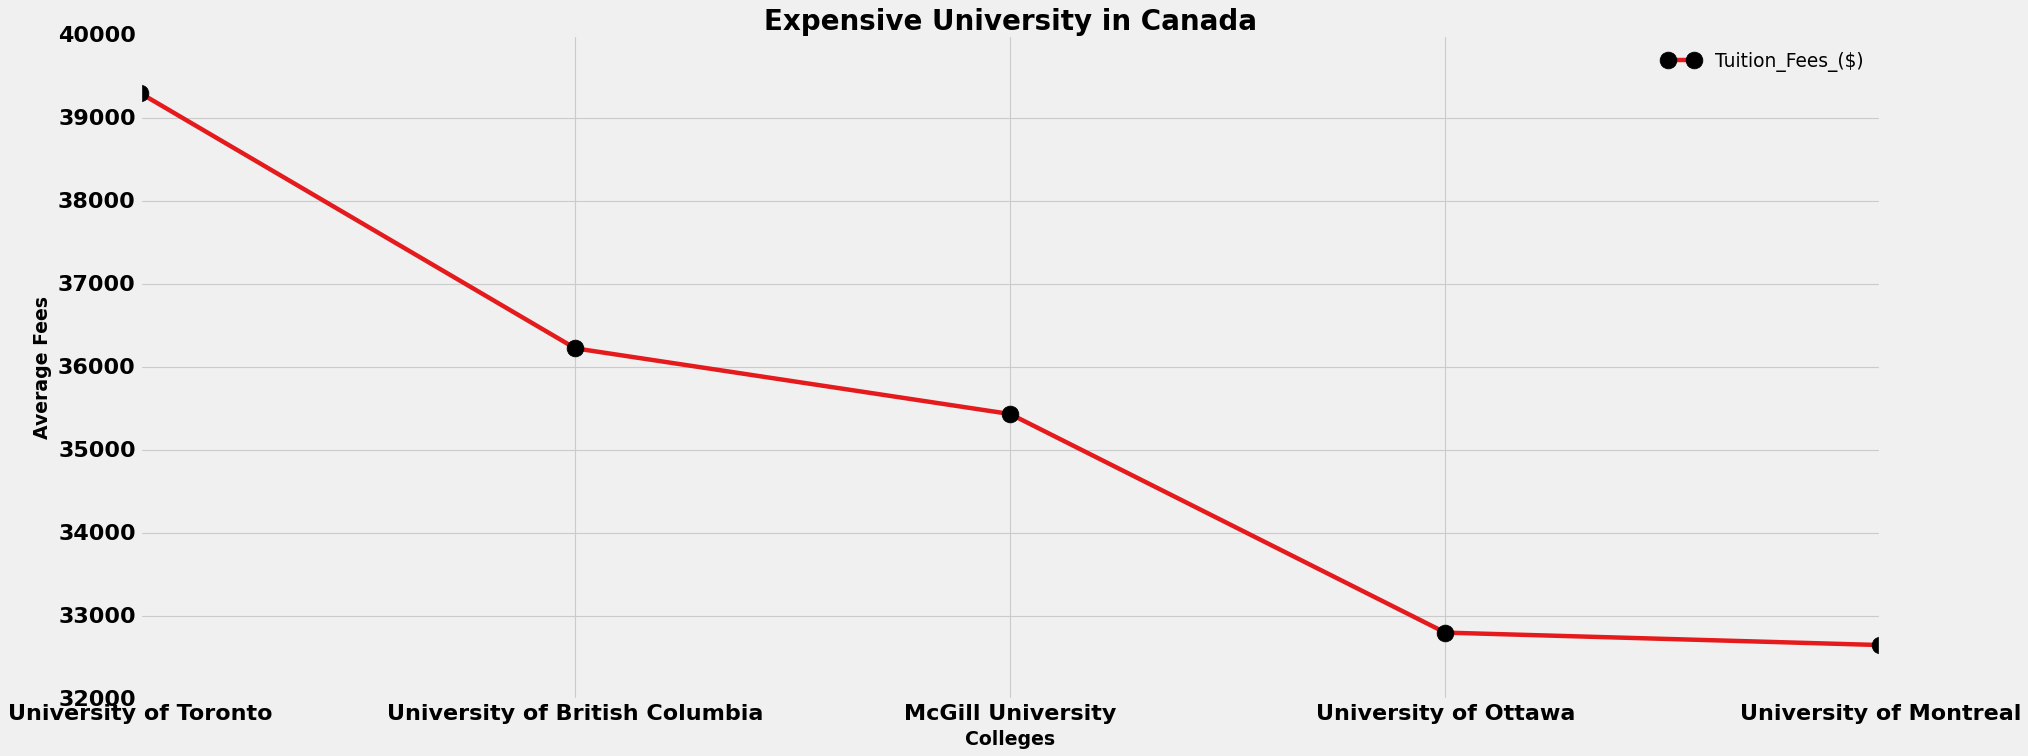

In [58]:
mt.style.use('fivethirtyeight')
# mt.subplot(2,1,1)

mt.figure(figsize=(25,10))

sea.lineplot(data=can_.head(5),marker='.',markersize=30,
             mfc='black',mec='black',palette='Set1')


mt.xticks(fontweight='bold',size=20)
mt.yticks(fontweight='bold',size=20)

mt.xlabel('Colleges',fontweight='demi',size=17)
mt.ylabel('Average Fees',fontweight='demi',size=17)

mt.title('Expensive University in Canada',fontweight='bold',size=25)


In [59]:
can_.tail(5)

,Tuition_Fees_($)
Universities,
Memorial University,24333.333333
Lakehead University,23900.000000
Laurentian University,23450.000000
University of Northern British Columbia,23000.000000
Université de Sherbrooke,20500.000000


(array([20500., 21000., 21500., 22000., 22500., 23000., 23500., 24000.,
        24500.]),
 [Text(0, 20500.0, '20500'),
  Text(0, 21000.0, '21000'),
  Text(0, 21500.0, '21500'),
  Text(0, 22000.0, '22000'),
  Text(0, 22500.0, '22500'),
  Text(0, 23000.0, '23000'),
  Text(0, 23500.0, '23500'),
  Text(0, 24000.0, '24000'),
  Text(0, 24500.0, '24500')])

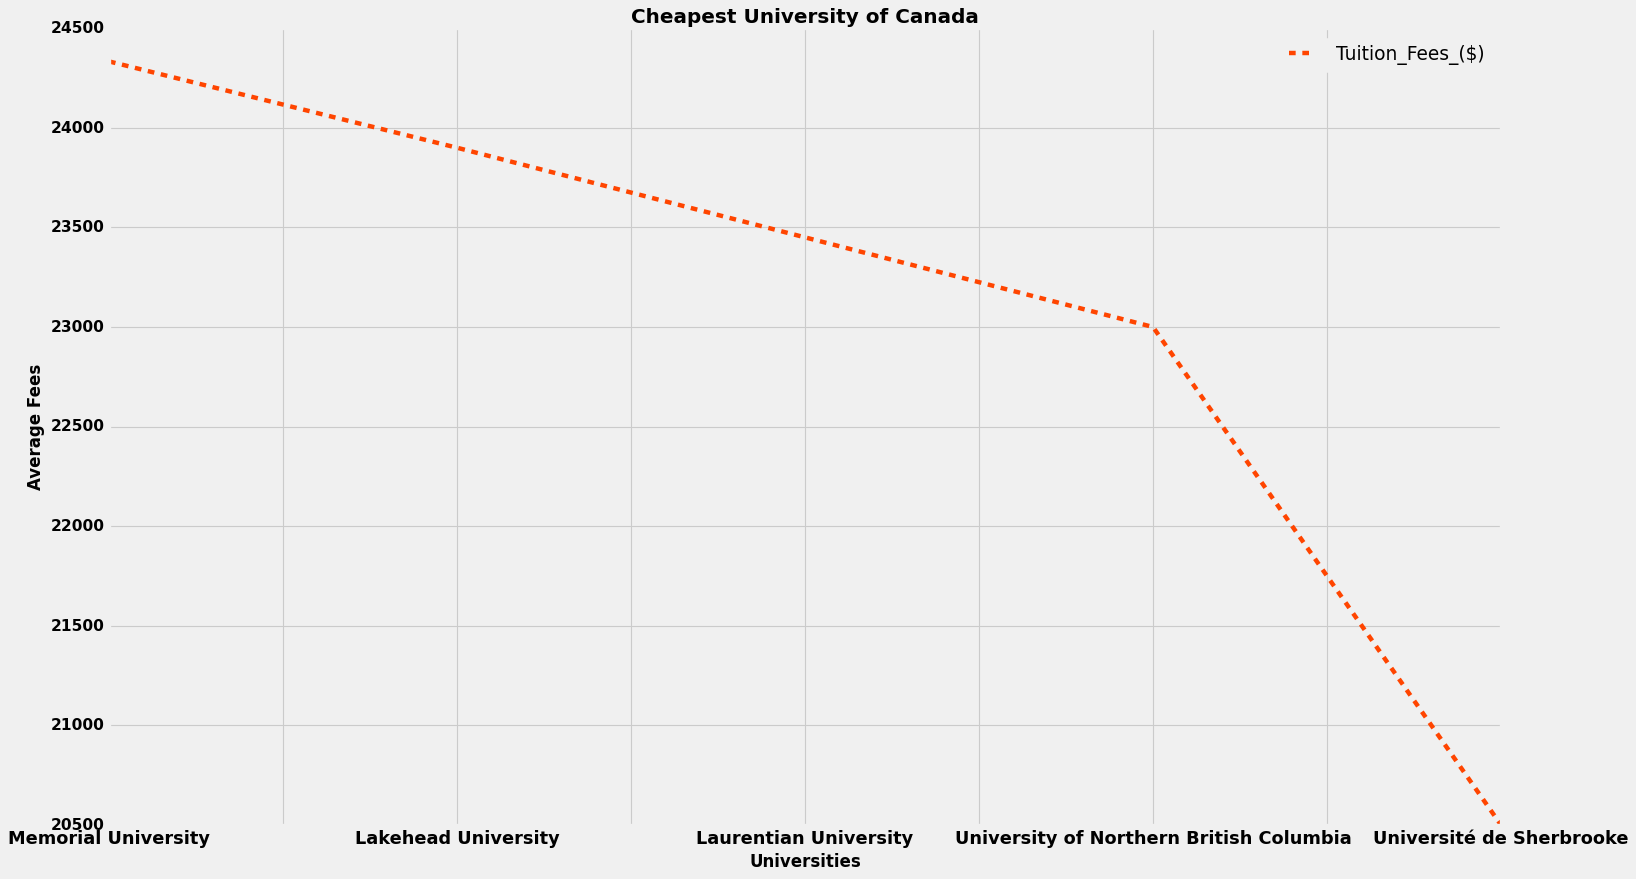

In [60]:
mt.style.use('seaborn-v0_8-bright')
# sea.set_style('default')
can_.tail(5).plot(kind='line',figsize=(20,12),
                  linestyle='--',color='orangered',
                  linewidth=4)

mt.title('Cheapest University of Canada',fontweight='bold',size=18)
mt.ylabel('Average Fees',fontweight='heavy',size=15)
mt.xlabel('Universities',fontweight='heavy',size=15)
mt.xticks(fontweight='semibold',size=16)
mt.yticks(fontweight='semibold',size=14)


In [61]:
can_city=you.loc['Canada'].groupby('City')['Rent_($)'].mean().sort_values(ascending=True)
cana=pd.DataFrame(can_city)
cana

,Rent_($)
City,
Prince George,750.000000
Sudbury,800.000000
Thunder Bay,800.000000
Sherbrooke,850.000000
Trois-Rivieres,850.000000
Moncton,900.000000
Regina,900.000000
St. John's,916.666667
Windsor,950.000000


Text(0.5, 1.0, 'Highest City Rent of Canada')

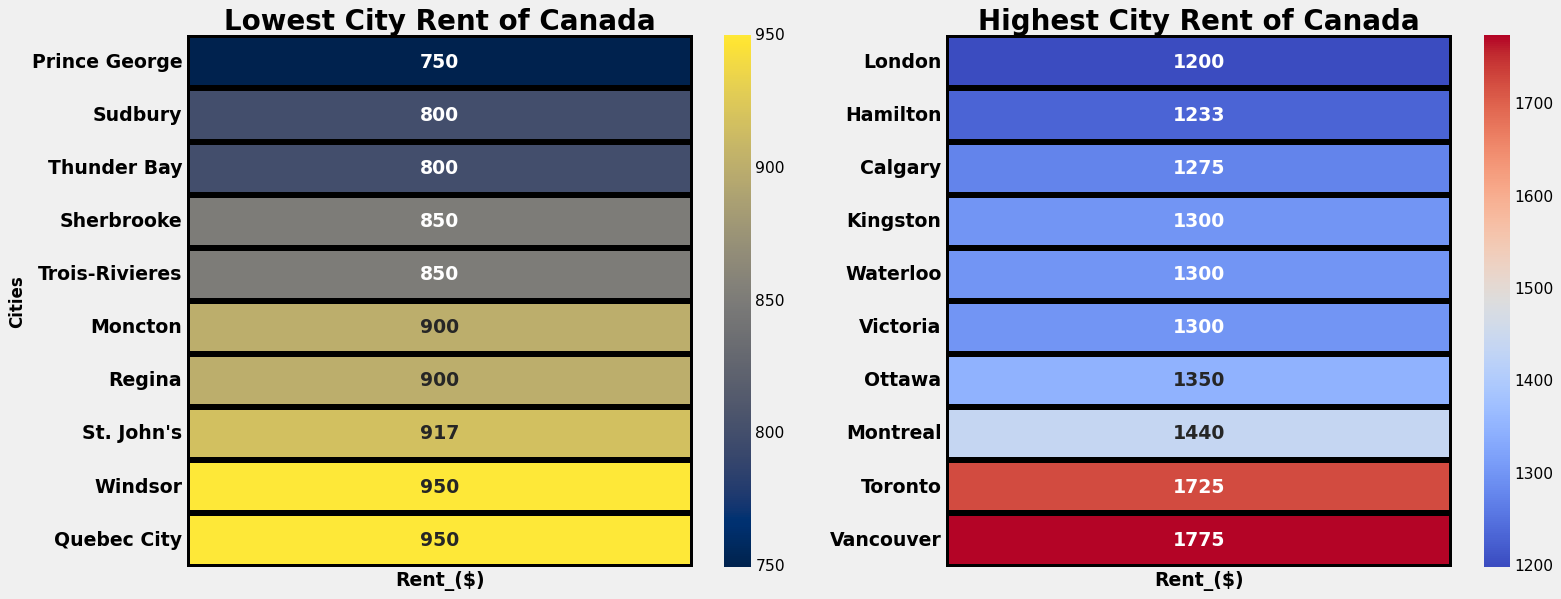

In [63]:
mt.figure(figsize=(20,8))

mt.subplot(1,2,1)
sea.heatmap(data=cana.head(10),cbar=True,
            linecolor='black',linewidth=5,
            fmt='.0f',annot=True,cmap='cividis',
            annot_kws=dict(size=17,fontweight='bold'))

mt.yticks(fontweight='bold',size=17)
mt.xticks(fontweight='heavy',size=17)
mt.ylabel('Cities',fontweight='bold',size=15)
mt.title('Lowest City Rent of Canada',fontweight='semibold',size=25)

mt.subplot(1,2,2)
sea.heatmap(data=cana.tail(10),cbar=True,
            cmap='coolwarm',linecolor='black',
            linewidth=4,fmt='.0f',
            annot=True,annot_kws=dict(size=17,fontweight='bold'))

mt.yticks(fontweight='bold',size=17)
mt.xticks(fontweight='heavy',size=17)
mt.ylabel('')
mt.title('Highest City Rent of Canada',fontweight='semibold',size=25)

In [64]:
you['Universities']=you["Universities"].str.replace('NTU','Nanyang Technological University')
you['Universities']=you["Universities"].str.replace("NUS","National University Singapore")
you["Universities"]=you["Universities"].str.replace("SMU",'Singapore Management University')
you["Universities"]=you["Universities"].str.replace("SUTD",'Singapore University of Technology & Design')
you["Universities"]=you["Universities"].str.replace("SIT","Singapore Institute Technology")

In [65]:
sing_univer=you.loc['Singapore'].groupby('Universities')['Tuition_Fees_($)'].mean().sort_values(ascending=False)
sing=pd.DataFrame(sing_univer)
sing.style.format(precision=2).bar(cmap='coolwarm')


,Tuition_Fees_($)
Universities,
Singapore University of Technology,39000.00
National University of Singapore,38500.00
National University Singapore,37050.00
Nanyang Technological University,36325.00
SIM Global Education,35000.00
Singapore Management University,34666.67
Singapore University of Technology & Design,34000.00
Singapore Institute Technology,29800.00
Nanyang Technological University Singapore,8900.00


In [66]:
sing_program=you.loc['Singapore'].groupby('Program')['Tuition_Fees_($)'].mean().sort_values(ascending=False)
sing_pro=pd.DataFrame(sing_program)
sing_pro

,Tuition_Fees_($)
Program,
Artificial Intelligence,38866.666667
Computer Engineering,38500.000000
Data Analytics,38000.000000
Digital Systems & AI,37900.000000
Robotics,37000.000000
Computer Science,36250.000000
Finance,35000.000000
Data Science & AI,34900.000000
Computing & Innovation,34200.000000


C:\Users\hp\AppData\Local\Temp\ipykernel_8336\3812190077.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sea.barplot(data=sing_pro,y='Program',x='Tuition_Fees_($)',palette='gist_rainbow')


(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.,
        40000.]),
 [Text(0.0, 0, '0'),
  Text(5000.0, 0, '5000'),
  Text(10000.0, 0, '10000'),
  Text(15000.0, 0, '15000'),
  Text(20000.0, 0, '20000'),
  Text(25000.0, 0, '25000'),
  Text(30000.0, 0, '30000'),
  Text(35000.0, 0, '35000'),
  Text(40000.0, 0, '40000')])

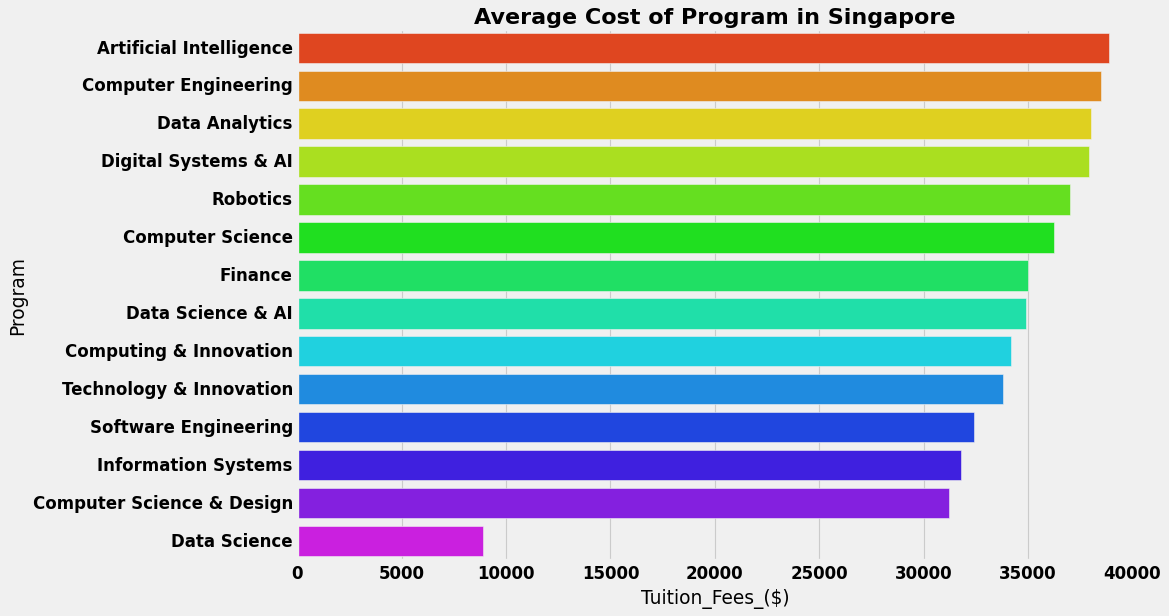

In [67]:
mt.style.use('seaborn-v0_8-dark-palette')

mt.figure(figsize=(12,8))
sea.barplot(data=sing_pro,y='Program',x='Tuition_Fees_($)',palette='gist_rainbow')

mt.title('Average Cost of Program in Singapore',fontweight='bold',size=20)
mt.yticks(fontweight='heavy',size=15)
mt.xticks(fontweight='semibold',size=15)


In [ ]:
# you['Abberivation']=you['University'].str.extract(r'\((.*?)\)')


In the visa column, where UK has highest visa fee around [$490] and japan has lowest visa fee about [$220].
Also,i pick up average Living cost of index where [Switzerland] has got top position and [New Zealand] has last position.
Moreover where top selling insurance for students nations are:-[USA, Switzerland, Canada].

In [ ]:
# can_city=you.loc['Canada'].groupby('City')['Rent_USD'].mean().sort_values(ascending=True)
# can=pd.DataFrame(can_city)
# can

In [ ]:
# mt.subplot(2,2,1)
# mt.figure(figsize=(10,5))
# sea.heatmap(data=can.head(10),annot_kws=dict(size=15,fontweight='bold'),
#             annot=True,fmt='.0f',
#             linecolor='black',linewidth=2,
#            cmap='flare',cbar=False)

# mt.yticks(fontweight='bold')
# mt.xticks(fontweight='bold')

# mt.subplot(2,2,3)
# # mt.figure(figsize=(4,4))
# sea.heatmap(data=can.tail(10),annot_kws=dict(size=15,fontweight='bold'),
#             annot=True,fmt='.0f',
#             linecolor='black',linewidth=2,
#            cmap='flare')

# mt.yticks(fontweight='bold')
# mt.xticks(fontweight='bold')

In [ ]:

    
# mt.subplot(1,2,1)

# sea.set_style("white")

# mt.figure(figsize=(4,4))

# sea.heatmap(data=can.head(10),annot_kws=dict(size=15,fontweight='bold'),
#             annot=True,fmt='.0f',
#             linecolor='black',linewidth=2,
#            cmap='flare')

In [ ]:
# can_city=you.loc['Canada'].groupby('City')['Rent_USD'].mean().sort_values(ascending=True)
# can=pd.DataFrame(can_city)
# ca=can.head(10)
# ca

In [ ]:
# can_city=you.loc['Canada'].groupby('City')['Rent_USD'].mean().sort_values(ascending=True)
# can=pd.DataFrame(can_city)
# c=can.tail(10)
# c

In [ ]:
# sea.set_style("white")

# mt.figure(figsize=(6,4))

# sea.heatmap(data=can.head(10),annot_kws=dict(size=15,fontweight='bold'),
#             annot=True,fmt='.0f',
#             linecolor='black',linewidth=2,
#            cmap='flare')

# mt.yticks(fontweight='bold')
# mt.xticks(fontweight='bold')

In [ ]:
# mt.figure(figsize=(25,25))

# mt.subplot(3,3,1)
# sea.heatmap(data=c.head(3),cbar=False)

# mt.subplot(3,3,2)
# sea.heatmap(data=ca.tail(3),cbar=False)

# mt.subplot(3,3,3)
# sea.heatmap(data=ca.tail(5),cbar=False)

# mt.subplot(3,3,4)
# sea.heatmap(data=ca.tail(7),cbar=False)

# mt.subplot(3,3,5)
# sea.heatmap(data=ca.head(5),cbar=False)

# mt.subplot(3,3,6)
# sea.heatmap(data=ca.head(7),cbar=False)


In [ ]:
# aus_univer.style.highlight_between(subset='Tuition_USD',left=35000,right=40000,color='red')
# aus_univer.style.highlight_between(subset='Rent_USD',left=1500,right=2000,color='skyblue')
# aus_univer.style.highlight_between(subset='Tuition_USD',left=30000,right=35000,color='coral')
# sea.barplot(x='City',y=['Tuition_USD','Rent_USD'])

In [ ]:
# you.Duration_Years.value_counts()

In [ ]:
# sea.barplot(data=level,palette='Set1')

In [ ]:
# uk=you.loc['UK']['Level'].value_counts()
# uk